# Limpieza de imágenes

In [1]:
from os import listdir
import cv2
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [218]:
def cleanData(img):
    '''
    Reconoce el rostro de personas sobre imágenes:
    - Crea una sección que encuadra el rostro.
    - Transforma la imagen a escala de grises.
    - Reescala la imagen a 48x48.
    - Traduce la información del cuadrante a np.array.
    
    En el caso de no reconocer ningun rostro devuelve /no.
    '''
    try:
        image = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
        face_p = faceCascade.detectMultiScale(
            image,
            scaleFactor=1.1,
            minNeighbors=5
        )

        (x, y, w, h) = face_p[0]

        crop_image = image[y:y+h,x:x+w]

        img_data=cv2.resize(crop_image,(60,60))
        
    except Exception as e:
        return e,'no'
    
    return img_data
        

#### Dirección de los datos

In [219]:
key_m = './input/men/'
key_w = './input/women/'
value_m = listdir(key_m)
value_w = listdir(key_w)

In [220]:
p_man = [key_m + m for m in value_m]
p_woman = [key_w + w for w in value_w]

all_keys = ['man', 'woman']
all_values = [p_man, p_woman]

Concat de todos los path

In [221]:
concat_values = p_man + p_woman
concat_values[:5]

['./input/men/00001722.jpg',
 './input/men/00001044.jpg',
 './input/men/00001291.png',
 './input/men/00001050.jpg',
 './input/men/00001736.jpg']

Diccionario con los valores clave de cada imagen

In [222]:
p_dict = {}

for e in range(len(concat_values)):
    p_dict[e] = {
        'sex': concat_values[e].split('/')[2],
        'name': concat_values[e].split('/')[3],
        'path': concat_values[e],
        'array': cleanData(concat_values[e])
    }

Limpieza de DataFrame final

In [242]:
data = pd.DataFrame(p_dict).T
data.head()

,sex,name,path,array
0,men,00001722.jpg,./input/men/00001722.jpg,"[[78, 79, 79, 79, 80, 80, 81, 81, 80, 78, 80, ..."
1,men,00001044.jpg,./input/men/00001044.jpg,"[[18, 27, 32, 27, 39, 41, 41, 41, 48, 65, 65, ..."
2,men,00001291.png,./input/men/00001291.png,"[[89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, ..."
3,men,00001050.jpg,./input/men/00001050.jpg,"[[30, 31, 37, 37, 31, 26, 30, 21, 22, 23, 22, ..."
4,men,00001736.jpg,./input/men/00001736.jpg,"[[255, 255, 254, 255, 255, 253, 247, 85, 25, 8..."


In [243]:
data.reset_index(drop=True, inplace=True)

In [244]:
dfDup = data

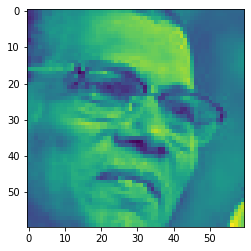

In [245]:
plt.imshow(np.flip(dfDup.array[0],1))

In [248]:
dfDup.array = dfDup.array.apply(lambda x: np.flip(x))

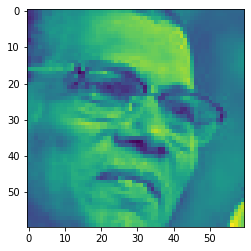

In [249]:
plt.imshow(dfDup.array[0])

In [250]:
dataD = pd.concat([data, dfDup], ignore_index=True)

In [251]:
len(dataD)

6660

In [252]:
#dataD['sex'] = pd.get_dummies(dataD['sex'])

In [253]:
dataD['array'][12]

array([IndexError('tuple index out of range'), 'no'], dtype=object)

In [254]:
sex = pd.get_dummies(dataD['sex'])

In [255]:
dataD['men'] = sex['men']
dataD['women'] = sex['women']

In [258]:
dataD['sex'] = dataD[['men','women']].apply(lambda x: pd.Series([x.values]), axis=1)

In [259]:
dataD

,sex,name,path,array,men,women
0,"[1, 0]",00001722.jpg,./input/men/00001722.jpg,"[[40, 45, 60, 74, 92, 94, 95, 107, 112, 110, 1...",1,0
1,"[1, 0]",00001044.jpg,./input/men/00001044.jpg,"[[190, 202, 199, 211, 196, 175, 215, 50, 51, 5...",1,0
2,"[1, 0]",00001291.png,./input/men/00001291.png,"[[132, 132, 130, 132, 131, 129, 178, 178, 178,...",1,0
3,"[1, 0]",00001050.jpg,./input/men/00001050.jpg,"[[198, 158, 36, 28, 17, 13, 41, 43, 32, 25, 21...",1,0
4,"[1, 0]",00001736.jpg,./input/men/00001736.jpg,"[[255, 255, 255, 255, 253, 252, 253, 181, 40, ...",1,0
...,...,...,...,...,...,...
6655,"[0, 1]",00002226.jpg,./input/women/00002226.jpg,"[[61, 53, 25, 31, 26, 22, 23, 22, 20, 26, 28, ...",0,1
6656,"[0, 1]",00001049.jpg,./input/women/00001049.jpg,"[[125, 141, 140, 138, 114, 127, 138, 160, 163,...",0,1
6657,"[0, 1]",00001288.png,./input/women/00001288.png,"[[18, 24, 21, 25, 33, 36, 22, 9, 23, 29, 30, 3...",0,1
6658,"[0, 1]",00000343.jpg,./input/women/00000343.jpg,"[[39, 48, 48, 67, 94, 99, 92, 103, 120, 133, 1...",0,1


In [260]:
dataD.drop(columns=['men','women'], inplace=True)

In [261]:
for e in range(len(dataD['array'])):
    if 'no' in dataD['array'][e]:
        dataD.drop(e, axis=0, inplace=True)
    else:
        pass

len(dataD)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


5620

In [262]:
dataD.to_pickle('./output/dataCleanGray.pkl')